<a href="https://colab.research.google.com/github/karoline-juliana/voice-gender/blob/main/the_voice_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de gêneros por voz usando Machine Learning (ML) e algumas Análises Exploratória de Dados (EDA).

## Autora: Karoline Juliana Costa da Silva

Database usada: https://www.kaggle.com/primaryobjects/voicegender

## Antes de começar...

O ambiente foi o Python 3, pois vem instalado muitas bibliotecas analíticas úteis.

Aqui estão vários pacotes (packages) úteis para carregar.

In [ ]:
import numpy as np #algebra linear
import pandas as pd #processamento de dados, arquivos CSV (ex pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

#Para ML
from sklearn.model_selection import train_test_split #seleção do modelo
from sklearn.linear_model import LogisticRegression #Regressão logística
from sklearn.metrics import confusion_matrix, accuracy_score #Matriz de confusão
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.svm import SVC #SVC
from sklearn.naive_bayes import GaussianNB #NB
from sklearn.tree import DecisionTreeClassifier #Árvore de decisão
from sklearn.ensemble import RandomForestClassifier #Random forest


     |████████████████████████████████| 540 kB 4.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=7a82a38268e3da402c4ecb551c9e291489c226c3422c97538543557a9c4560a5
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


Os arquivos de dados de entrada estão disponíveis no diretório "../input/" somente leitura.

Executando a janela abaixo (clicando em executar ou pressionando Shift + Enter) irá listar todos os arquivos no diretório de entrada.

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle/Voice'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Kaggle/Voice/voice.csv


É possível gravar até 5 GB no diretório atual, que é preservado como saída quando você cria uma versão usando "Salvar e executar tudo".

É possível também gravar arquivos temporários, mas eles não serão salvos fora da sessão atual.

## Carregando e visualizando o conjunto de dados.

Incluí o conjunto de dados no projeto usando a biblioteca Pandas. Em seguida, obtive informações gerais sobre o conjunto de dados e examinei as primeiras cinco linhas.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Kaggle/Voice/voice.csv', sep = ",")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


A partir da descrição dos dados, sabe-se que:

**meanfreq**: frequência média (em kHz)

**sd**: desvio padrão da frequência

**median**: frequência mediana (em kHz)

**Q25**: primeiro quantil (em kHz)

**Q75**: terceiro quantil (em kHz)

**IQR**: intervalo interquantil (em kHz)

**skew**: viés (veja a nota na descrição specprop)

**kurt**: curtose (ver nota na descrição specprop)

**sp.ent**: entropia espectral

**sfm**: achatamento espectral

**mode**: modo de frequência

**centroid**: centróide de frequência (ver specprop)

**peakf**: frequência de pico (frequência com maior energia)

**meanfun**: média da frequência fundamental medida através do sinal acústico

**minfun**: frequência fundamental mínima medida através do sinal acústico

**maxfun**: frequência fundamental máxima medida através do sinal acústico

**meandom**: média da frequência dominante medida através do sinal acústico

**mindom**: mínimo de frequência dominante medida através do sinal acústico

**maxdom**: máximo da frequência dominante medida através do sinal acústico

**dfrange**: faixa de frequência dominante medida através do sinal acústico

**modindx**: índice de modulação. Calculado como a diferença absoluta acumulada entre medições adjacentes de frequências fundamentais dividida pela faixa de frequência

**label**: masculino ou feminino

## Pré-processamento de dados

Primeiro, verifiquei se há valores nulos no conjunto de dados com a função isnull. Porque um conjunto de dados contendo valores nulos torna nosso trabalho difícil.

In [ ]:
df.isnull().values.any()

False

Com sorte, não temos nenhum valores nulos. 

Nesse momento determinei as variáveis ​​dependentes (y) e independentes (x) do conjunto de dados. 

É aconselhado converter os valores das variáveis ​​dependentes em tipos inteiros antes de criar um modelo de ML. 

Nossa variável dependente é a coluna "label", construído com valores de string ("male" e "female"). 

Então, mudei esses valores. Substitui os "males" por 0 e os "females" por 1:



In [ ]:
y=df.label
x_df=df.drop(["label"],axis=1)
x=(x_df-np.min(x_df))/(np.max(x_df)-np.min(x_df))

In [ ]:
df.label=[0 if each=="male" else 1 for each in df.label]

## Divisão de treino e teste.

Antes de construir os modelos de ML, dividi os dados em dados de treino e teste como uma etapa final:

In [ ]:
x_treino,x_teste,y_treino,y_teste=train_test_split(x,y,test_size=0.2,random_state=42)

Estamos prontos para criar modelos de ML! 

Mas não tenhamos pressa!

Antes de construir modelos de ML, visualizei os dados para entender melhor.

## Visualização de dados.

Visualizei a distribuição de gênero com gráfico de pizza:

male      1584
female    1584
Name: label, dtype: int64


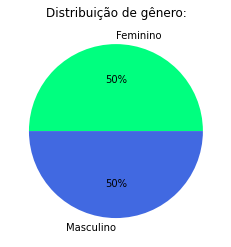

In [ ]:
#  Distribuição de gênero 
print(y.value_counts())
plt.pie(y.value_counts(),labels=["Feminino","Masculino"],colors=["springgreen","royalblue"],autopct='%1.0f%%')
plt.title("Distribuição de gênero:")
plt.show()

Com sorte (de novo!) a distribuição dos gêneros estão balanceados, felizmente!

Criei um mapa de calor de correlação para ver como as variáveis ​​se relacionam entre si:

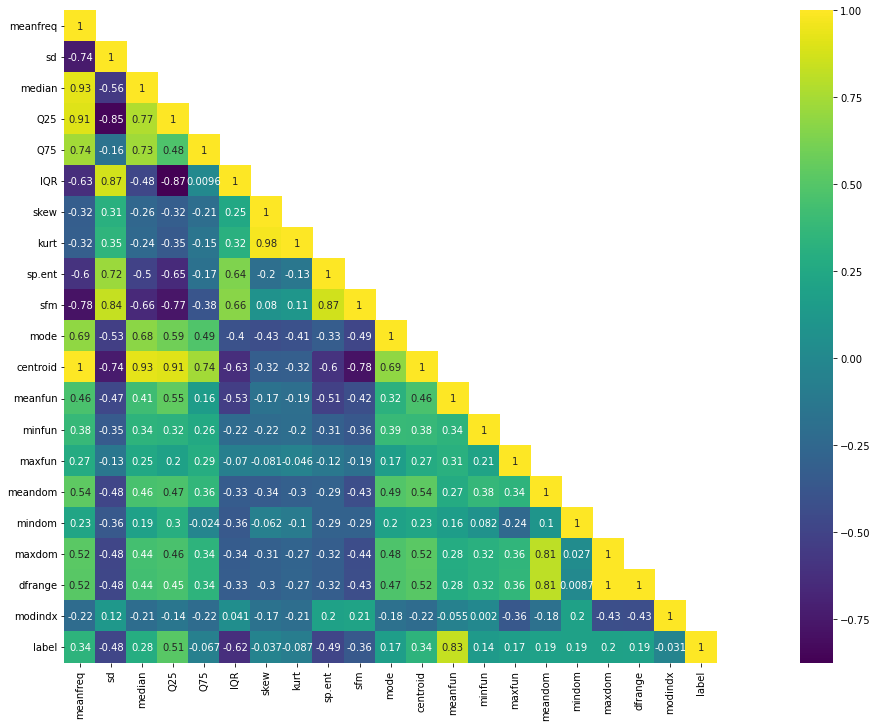

In [ ]:
# mapa de calor de correlação
cor_mapa= df[:].corr()
mascara = np.array(cor_mapa)
mascara[np.tril_indices_from(mascara)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mapa,mask=mascara,square=True,annot=True,cbar=True, cmap='viridis')

### Análise Univariada

Como todas as variáveis são numéricas, usei histograma e gráfico de barras.

Verifiquei todas as colunas presentes no dataset:

In [ ]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

Verifiquei se tem outliers nos dados calculando o intervalo de 1,5 IQR.

In [ ]:
def outliers(col):
    q1,q3=df[col].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)

Defini uma função que gera os gráficos...

In [ ]:
def plot(col):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=col,ax=axes[0])
    sns.distplot(a=df[col],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)
    lower,upper = outliers(col)
    l=[df[col] for i in df[col] if i>lower and i<upper] 
    print("Número de pontos de dados restantes se os outliers forem removidos : ",len(l))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Número de pontos de dados restantes se os outliers forem removidos :  3104
Número de pontos de dados restantes se os outliers forem removidos :  3158


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Número de pontos de dados restantes se os outliers forem removidos :  3059


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Número de pontos de dados restantes se os outliers forem removidos :  3135
Número de pontos de dados restantes se os outliers forem removidos :  3141


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Número de pontos de dados restantes se os outliers forem removidos :  2938
Número de pontos de dados restantes se os outliers forem removidos :  2836


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Número de pontos de dados restantes se os outliers forem removidos :  3162
Número de pontos de dados restantes se os outliers forem removidos :  3168


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Número de pontos de dados restantes se os outliers forem removidos :  3168


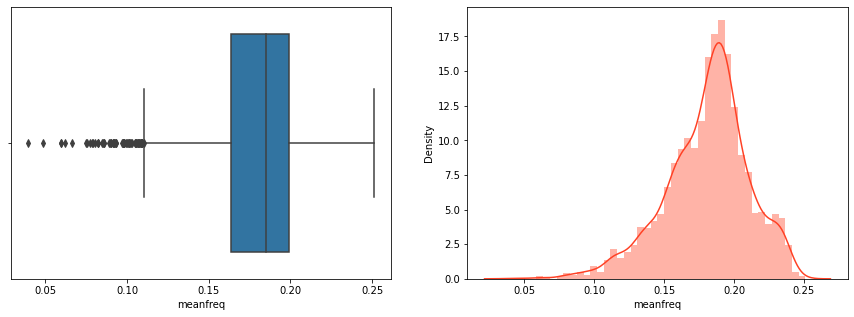

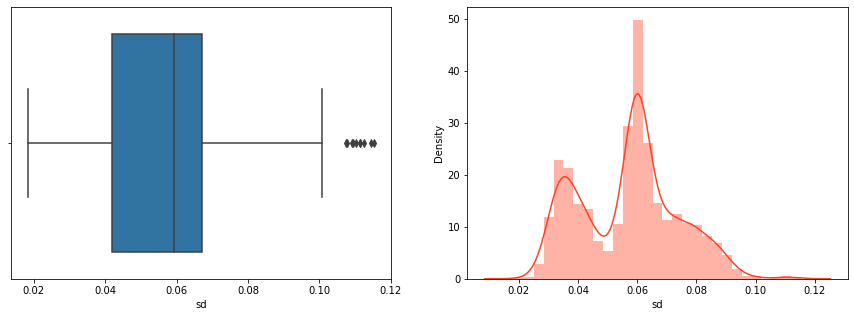

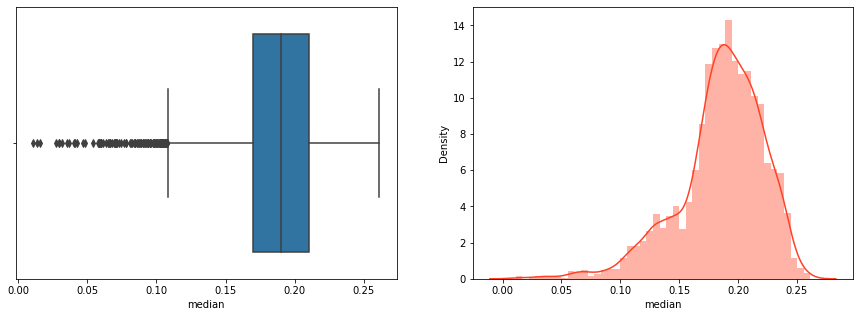

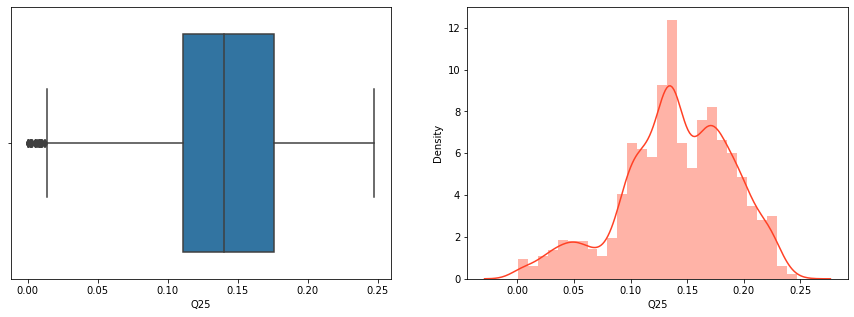

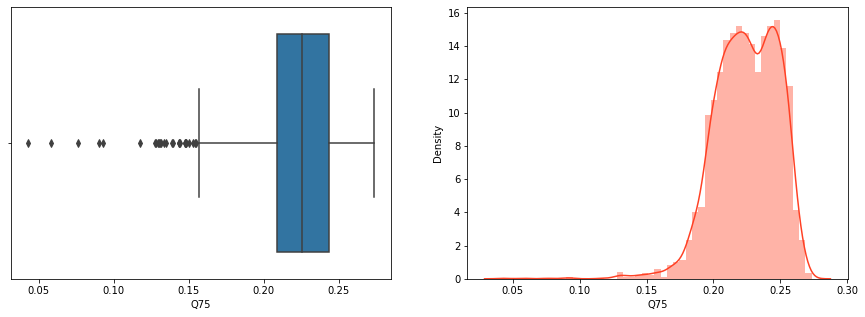

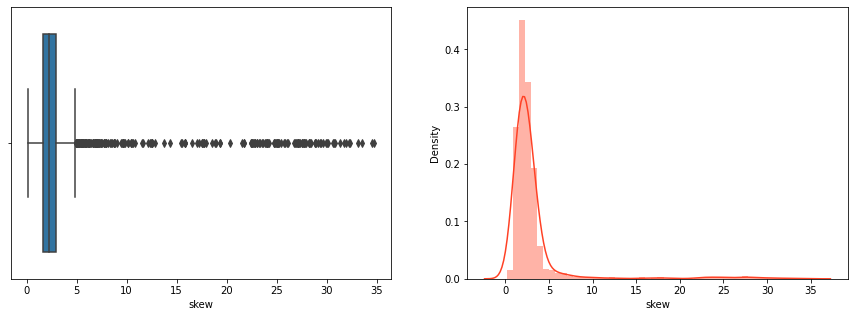

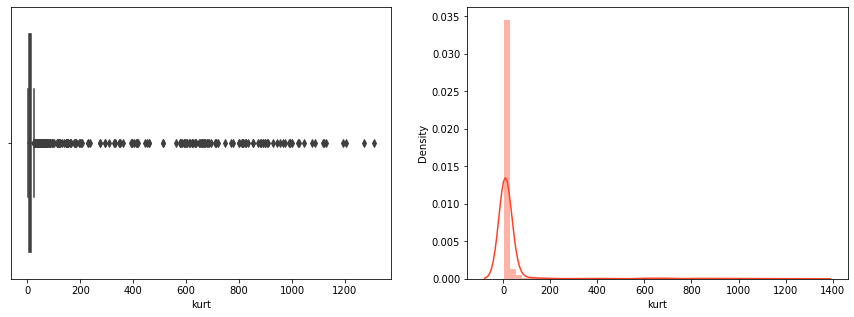

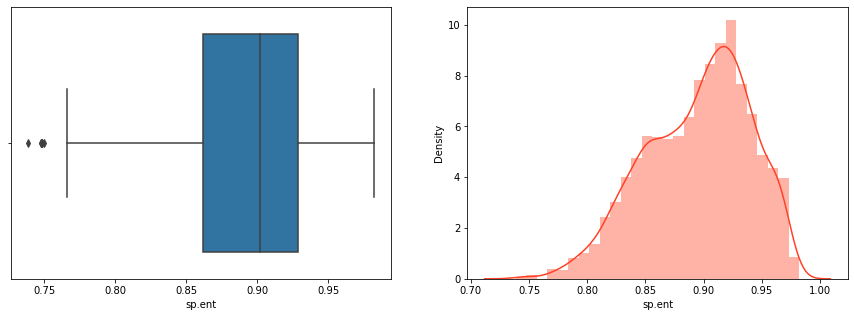

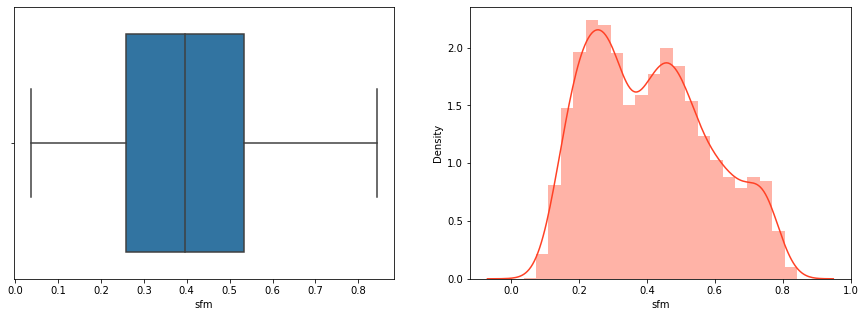

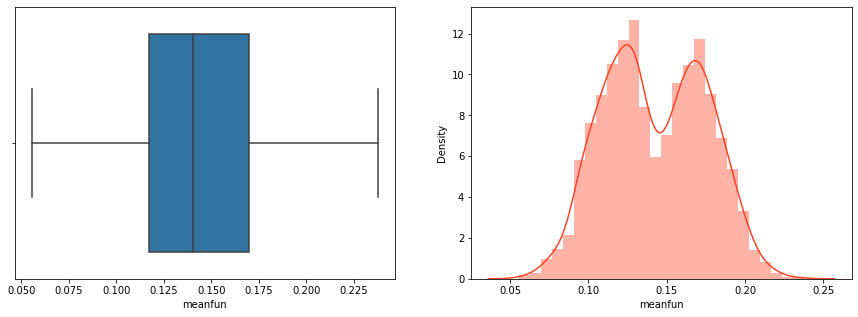

In [ ]:
plot('meanfreq')
plot('sd')
plot('median')
plot('Q25')
plot('Q75')
plot('skew')
plot('kurt')
plot('sp.ent')
plot('sfm')
plot('meanfun')


### Análise Bivariada

Correlação entre as variáveis dos dados.

Traçei as variáveis em relação a coluna 'label' para comparar as distribuições.

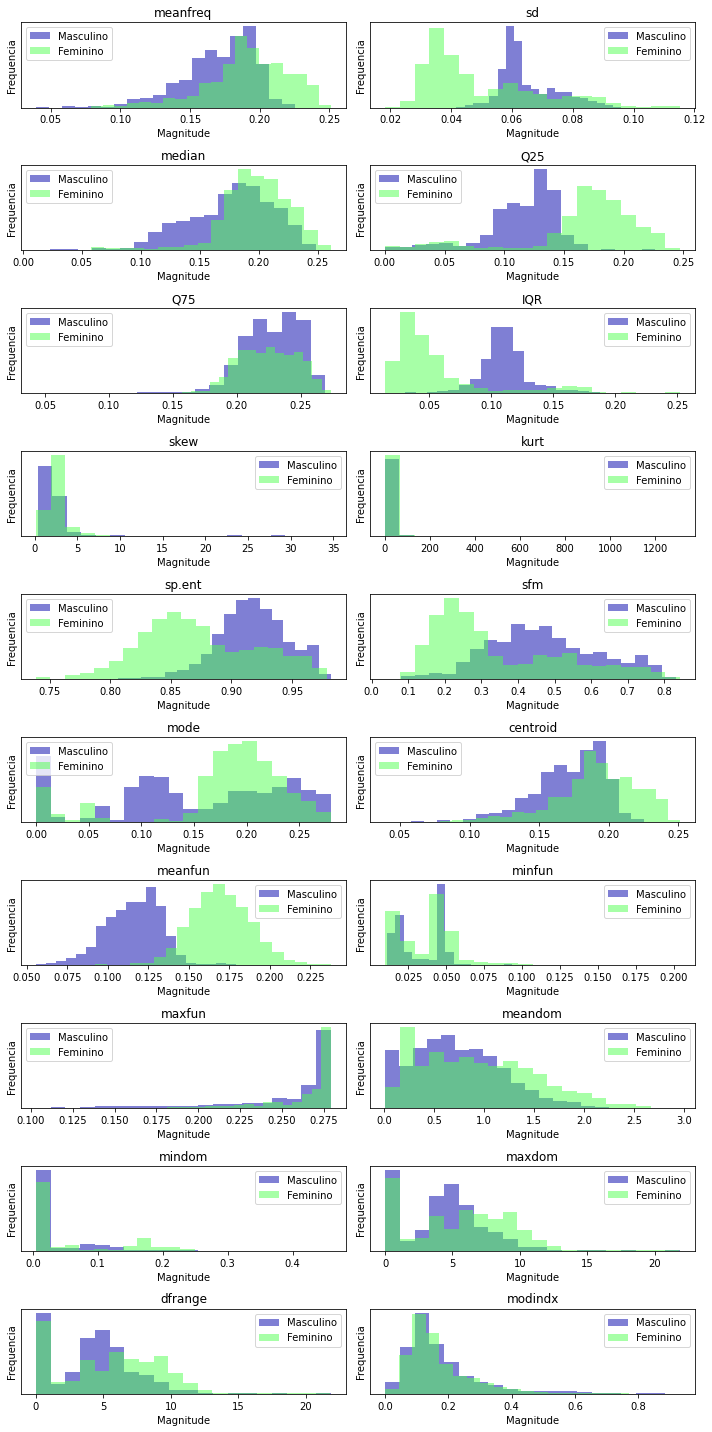

In [ ]:
gen = pd.read_csv('/content/drive/MyDrive/Kaggle/Voice/voice.csv')
gen_df = pd.DataFrame(gen)
gen_df.head()
masculino = gen.loc[gen['label']=='male']
feminino = gen.loc[gen['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(masculino.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(feminino.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(masculino)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Magnitude")
    ax[i].set_ylabel("Frequencia")
    ax[i].legend(["Masculino", "Feminino"], loc="best")

fig.tight_layout()

Observei que as mulheres têm frequência média mais alta do que os homens.

Gráfico de Dispersão de entropia espectral pela média da frequência fundamental medida através do sinal acústico

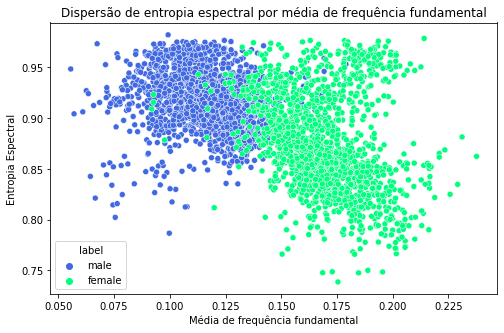

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=gen_df, x="meanfun", y="sp.ent",hue="label", palette=['royalblue','springgreen'])
plt.title("Dispersão de entropia espectral por média de frequência fundamental")
plt.xlabel("Média de frequência fundamental")
plt.ylabel("Entropia Espectral")
plt.show()

Dispersão da frequência média (em kHz) pela média da frequência fundamental medida através do sinal acústico

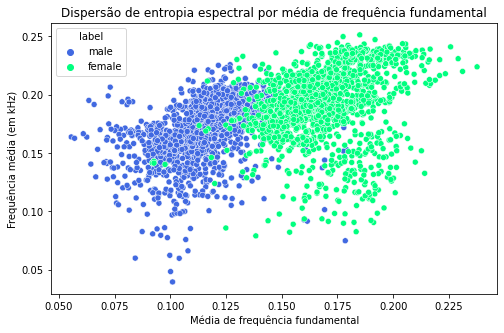

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=gen_df, x="meanfun", y="meanfreq",hue="label", palette=['royalblue','springgreen'])
plt.title("Dispersão de entropia espectral por média de frequência fundamental")
plt.xlabel("Média de frequência fundamental")
plt.ylabel("Frequência média (em kHz)")
plt.show()

IQR por gênero (Stripplot): 

(IQR: intervalo interquantil (em kHz))

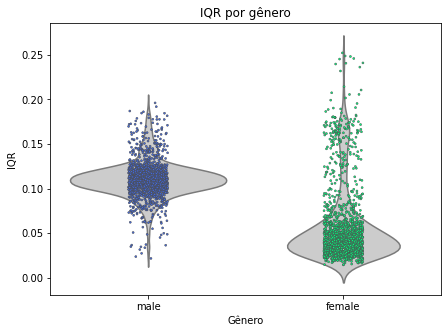

In [ ]:
plt.figure(figsize=(7,5))
sns.violinplot(x="label", y="IQR", data=gen_df, inner=None, color=".8")
sns.stripplot(data=gen_df, x="label", y="IQR",jitter=True, palette=['royalblue','springgreen'], size= 2, linewidth=0.5)
plt.title("IQR por gênero")
plt.xlabel("Gênero")
plt.ylabel("IQR")
plt.show()

Agora sim, construi modelos de ML.

## Machine Learning

## Regressão logística.

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária (Verdadeiro-Falso, Sim-Não, 1-0, Cão-Gato, Bom-Ruim, Masculino-Feminino...), em função de uma ou mais variáveis independentes contínuas e/ou binárias.

In [ ]:
lr=LogisticRegression()
lr.fit(x_treino,y_treino)
print("Acurácia do Teste: {} %".format(lr.score(x_teste,y_teste)*100))

Acurácia do Teste: 98.26498422712933 %


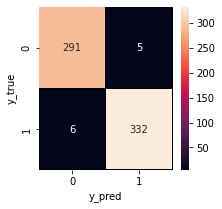

In [ ]:
#Matriz de Confusão:
y_pred_lr=lr.predict(x_teste)
y_true=y_teste
cm=confusion_matrix(y_pred_lr,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="black",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## KNN

K-Nearest Neighbor (KNN) é um classificador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. Ele é um dos algoritmos de aprendizado de máquina mais simples. O treino é formado por vetores de n dimensões. Quando uma previsão é feita, os vizinhos mais próximos são pesquisados ​​em todo o conjunto de dados. O valor de k que escolhi determina quantos elementos vizinhos examinei. Quando há um valor a ser classificado, a distância aos k vizinhos é calculada separadamente.

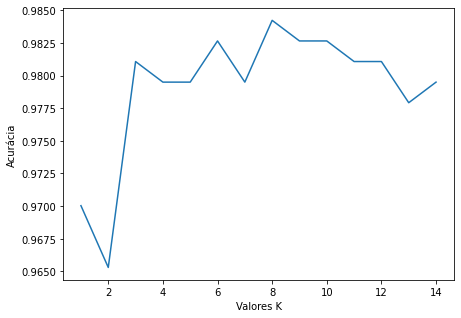

In [ ]:
lista_pontos=[]
#Encontrando o número ideal k
for each in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_treino,y_treino)
    lista_pontos.append(knn.score(x_teste,y_teste))
plt.figure(figsize=(7,5))
plt.plot(range(1,15),lista_pontos)
plt.xlabel("Valores K")
plt.ylabel("Acurácia")
plt.show()

Conforme ilustrado no gráfico acima, com k = 9, obtive o valor de precisão mais alto.

Acurácia do Teste: 98.26498422712933 %


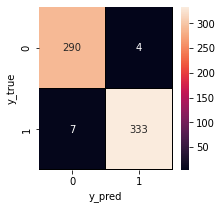

In [ ]:
#Matriz de Confusão (k=9):
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_treino,y_treino)
print("Acurácia do Teste: {} %".format(knn.score(x_teste,y_teste)*100))
y_pred_knn=knn.predict(x_teste)
y_true=y_teste
cm=confusion_matrix(y_pred_knn,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="black",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## SVM

O SVM (Support Vector Machine) é um algoritmo que busca uma linha de separação entre duas classes distintas analisando os dois pontos, um de cada grupo, mais próximos da outra classe. Isto é, o SVM escolhe a reta — também chamada de hiperplano em maiores dimensões— entre dois grupos que se distancia mais de cada um (no caso abaixo, a reta vermelha).

In [ ]:
svm=SVC(random_state=42)
svm.fit(x_treino,y_treino)
print("Acurácia do Teste: {} %".format(svm.score(x_teste,y_teste)*100))

Acurácia do Teste: 98.42271293375394 %


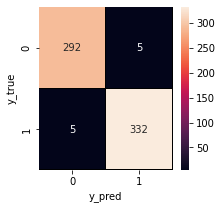

In [ ]:
#Matriz de Confusão:
y_pred_svm=svm.predict(x_teste)
y_true=y_teste
cm=confusion_matrix(y_pred_svm,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="black",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Naive Bayes

Tomando como premissa a suposição de independência entre as variáveis do problema, o modelo de Naïve Bayes realiza uma classificação probabilística de observações, caracterizando-as em classes pré-definidas. O Naïve Bayes é um dos modelos mais conhecidos a aplicar o conceito de probabilidade. Esse modelo, como o nome indica, faz uso do teorema de Bayes como princípio fundamental. 

In [ ]:
nb=GaussianNB()
nb.fit(x_treino,y_treino)
print("Acurácia do Teste: {} %".format(nb.score(x_teste,y_teste)*100))

Acurácia do Teste: 90.85173501577287 %


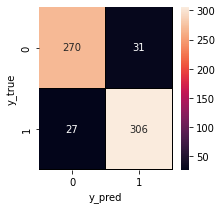

In [ ]:
#Matriz de Confusão:
y_pred_nb=nb.predict(x_teste)
y_true=y_teste
cm=confusion_matrix(y_pred_nb,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="black",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Árvore de decisão.

As árvores de decisão são uma representação simples do conhecimento e uma forma eficiente de construir classificadores que podem predizer valores de determinados atributos de um conjunto de dados. Ele pode processar tanto dados numéricos quanto categóricos.

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_treino,y_treino)
print("Acurácia do Teste: {} %".format(dt.score(x_teste,y_teste)*100))

Acurácia do Teste: 96.52996845425868 %


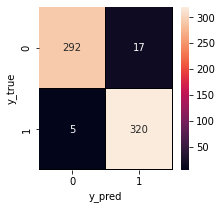

In [ ]:
#Matriz de Confusão:
y_pred_dt=dt.predict(x_teste)
y_true=y_teste
cm=confusion_matrix(y_pred_dt,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="black",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Random Forest.

A estrutura básica deste modelo consiste em árvores de decisão. Se construirmos n árvores usando valores aleatórios no conjunto de dados, criaremos um modelo de floresta aleatório. Então, floresta aleatória é composta de árvores que são construídas por valores aleatórios e tem galhos.

In [ ]:
rf=RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(x_treino,y_treino)
print("Acurácia do Teste: {} %".format(rf.score(x_teste,y_teste)*100))

Acurácia do Teste: 97.79179810725552 %


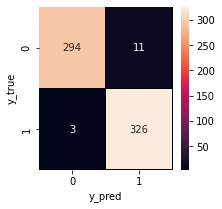

In [ ]:
#Matriz de Confusão:
y_pred_rf=rf.predict(x_teste)
y_true=y_teste
cm=confusion_matrix(y_pred_rf,y_true)
f,ax=plt.subplots(figsize=(3,3))
sns.heatmap(cm,annot=True,linecolor="black",linewidth=0.3,fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Comparando os resultados.

In [ ]:
modelos=[LogisticRegression(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GaussianNB()]
nomes_modelo=['RegressaoLogistica','SVM','KNearestNeighbors','RandomForest','ArvoreDecisão',
             'NaiveBayes']

acc=[]
d={}

for modelo in range(len(modelos)):
    clf=modelos[modelo]
    clf.fit(x_treino,y_treino)
    pred=clf.predict(x_teste)
    acc.append(accuracy_score(pred,y_teste))
     
d={'Algoritmo de modelagem':nomes_modelo,'Acuracia':acc}

In [ ]:
acc=pd.DataFrame(d)
acc

,Algoritmo de modelagem,Acuracia
0,RegressaoLogistica,0.982650
1,SVM,0.984227
2,KNearestNeighbors,0.979495
3,RandomForest,0.984227
4,ArvoreDecisão,0.963722
5,NaiveBayes,0.908517


Visualizando em gráfico de barras.

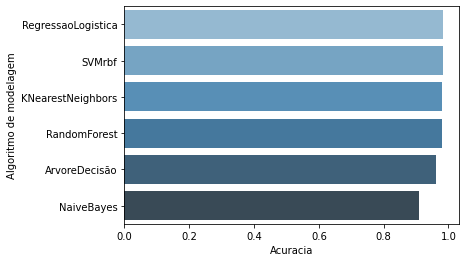

In [ ]:
sns.barplot(y='Algoritmo de modelagem',x='Acuracia',data=acc, palette='Blues_d');

## Concluindo...

Dentre os algoritmos que apliquei, alcançamos a maior precisão no algoritmo Support Vector Machine (SVM), e a menor precisão no algoritmo Naive Bayes.

Dos gráficos de barras: temos alguns outliers de acordo com a regra 1.5 IQR. Com mais outliers à esquerda da distribuição.

Meanfun é a variável mais correlacionada com o rótulo de interesse 'label'.

As mulheres têm frequência média mais alta do que os homens.

Todos os modelos que apliquei são algoritmos de aprendizagem de máquina supervisionado.

A frequência fundamental média parece ser um indicador do gênero da voz, com um limiar de 140Hz separando as classificações masculina da feminina.